In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("ProcessedData.csv")
df.head()

,Name,Cuisines,Area,Full_Address,AverageCost,Total Reviews,Total Ratings,Cost Category,Features,Testing Features,bag_of_words
0,Jyoti Vihar,south indian,Camac Street Area,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",300,6428,4.1,midrange,homedelivery takeaway vegonly indoorseating,homedelivery takeaway vegonly indoorseating mi...,south indian homedelivery takeaway vegonly ind...
1,WOW! Momo,"momos, fast food, tibetan",Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",350,11569,4.1,midrange,homedelivery takeaway indoorseating,homedelivery takeaway indoorseating midrange,momos fast food tibetan homedelivery takeaway ...
2,Zam Zam,"biryani, rolls",Park Circus Area,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",500,85001,4.3,expensive,homedelivery takeaway indoorseating,homedelivery takeaway indoorseating expensive,biryani rolls homedelivery takeaway indoorseat...
3,Daily Bhoj,bengali,Topsia,"139/1G, Tljala Road, Topsia, Kolkata",150,2260,3.9,cheapeats,homedelivery,homedelivery cheapeats,bengali homedelivery cheapeats
4,Behnam,"biryani, north indian, mughlai, rolls, kebab, ...",Topsia,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",200,151,2.9,midrange,homedelivery takeaway,homedelivery takeaway midrange,biryani north indian mughlai rolls kebab awadh...


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = word_tokenize(text)
    
    for word in words: 
        # Remove stop words and non alphabet tokens
        if word not in stop_words and word.isalpha(): 
            temp_sent.append(word)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    
    return full_sentence

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [14]:
def Final_Recommender(description,Area):
    
    # Convert user input to lowercase
    description = description.lower()

    data = df.copy()
    
    data = data[data['Area'] == Area]
        
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate the similarity for the differnt models
    similarity = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = similarity[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    # Plotting the scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(similarity.flatten(), np.arange(similarity.size), c=similarity.flatten(), cmap='viridis')
    plt.colorbar(label='Similarity')
    plt.title('Similarity Scatter Plot')
    plt.xlabel('Linear kernel Similarity')
    plt.ylabel('User Data Index')
    plt.show()

    return data[['Name', 'Area', 'Full_Address', 'AverageCost', 'Cuisines', 'Total Ratings', 'similarity']].head(5)

### Test Case 

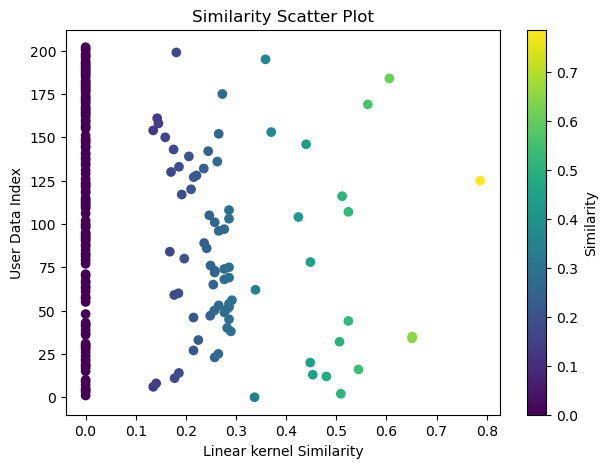

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
2966,Food Junction,Baguihati,"101/1, Sahid Sunil Sen Sarani, Baguihati, Kolkata",500,"chinese, north indian, biryani",3.7,0.786977
1642,The Floresta Restaurant,Baguihati,"EB/6, Deshbandhu Nagar, Baguihati, Kolkata",700,"chinese, north indian",3.7,0.651254
1606,Paramparaa,Baguihati,"458, Dum Dum Park Road, Narantal, South Dum Du...",450,"north indian, chinese",4.0,0.651254
3185,Master Chef Pizza,Baguihati,"CD-BG-4, Jyangra Ghoshpara Bazar, Near Naba Ja...",500,"fast food, pizza",3.6,0.605871
3118,New Arsalan Biryani House,Baguihati,"Jhawtala Post Office Hathoyara, Ward 12, Bidha...",200,biryani,0.0,0.562909


In [15]:
# User input
user_choice_cuisine ='biryani'
user_choice_Features = 'Indoorseating'
user_choice_CostCategory ='expensive'
user_choice_Area='Baguihati'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory
Final_Recommender(description=description,Area=user_choice_Area)